In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# ÌïúÍ∏Ä Í∏ÄÍº¥Ï≤¥ Î≥ÄÍ≤Ω
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() Ïù¥Îü∞Í±∞ ÌñàÏùÑ Îïå, Ïª¨ÎüºÏù¥ ÏÉùÎûµÎêòÏßÄ ÏïäÍ≥†, Î™®Îì† Ïª¨Îüº Îú®Í≤å
pd.set_option('display.max_columns', None)
# ÏßÄÏàò ÌëúÍ∏∞Î≤ï ÎåÄÏã†Ïóê ÏÜåÏàòÏ†êÏúºÎ°ú ÌëúÏãúÌïòÎäîÏΩîÎìú
pd.options.display.float_format = '{:.2f}'.format
# Í∞í Í∏∏Ïù¥ Ï†úÌïú X
pd.set_option('display.max_colwidth', None) # Í∞í Í∏∏Ïù¥ Ï†úÌïú ÏóÜÏùå

## XGBoost ÏßÑÌñâ
1. ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞
2. SMOTE-NC Îç∞Ïù¥ÌÑ∞
3. SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞
4. Í∞ÄÏ§ëÏπò

Î™®Îç∏ÎßÅ Í≥ºÏ†ïÏùÄ Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏùºÎã® ÏßÑÌñâÎê®.

### 1. ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞Î°ú XGB ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [5]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©, Ï†ïÍ∑úÌôîÎ•º ÏßÑÌñâÌïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞.

train = pd.read_csv("data/train/randomunder_modeling/train.csv")
test = pd.read_csv("data/train/randomunder_modeling/test.csv")

XGB ÌïôÏäµ

In [6]:
from xgboost import XGBClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# XGBoost Î™®Îç∏ ÏÉùÏÑ±
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# Î™®Îç∏ ÌïôÏäµ
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.80

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932419
           1       0.03      0.74      0.05     13176

    accuracy                           0.80   1945595
   macro avg       0.51      0.77      0.47   1945595
weighted avg       0.99      0.80      0.89   1945595


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1556205  376214]
 [   3445    9731]]


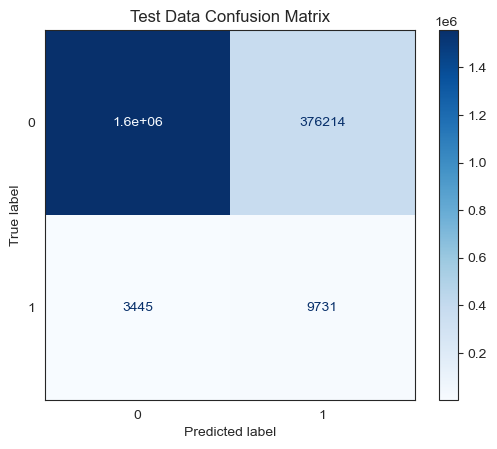

Test AUC-ROC: 0.85


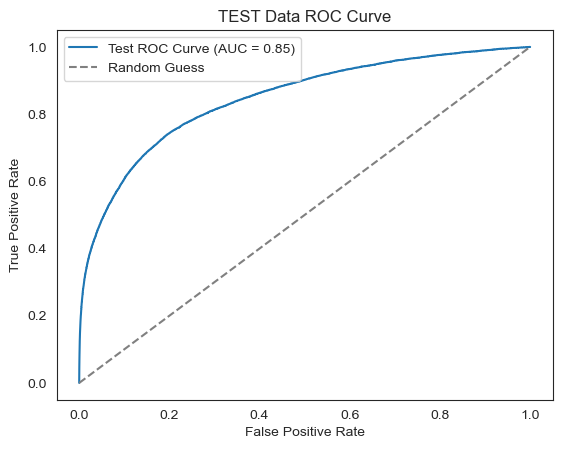

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = xgb_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

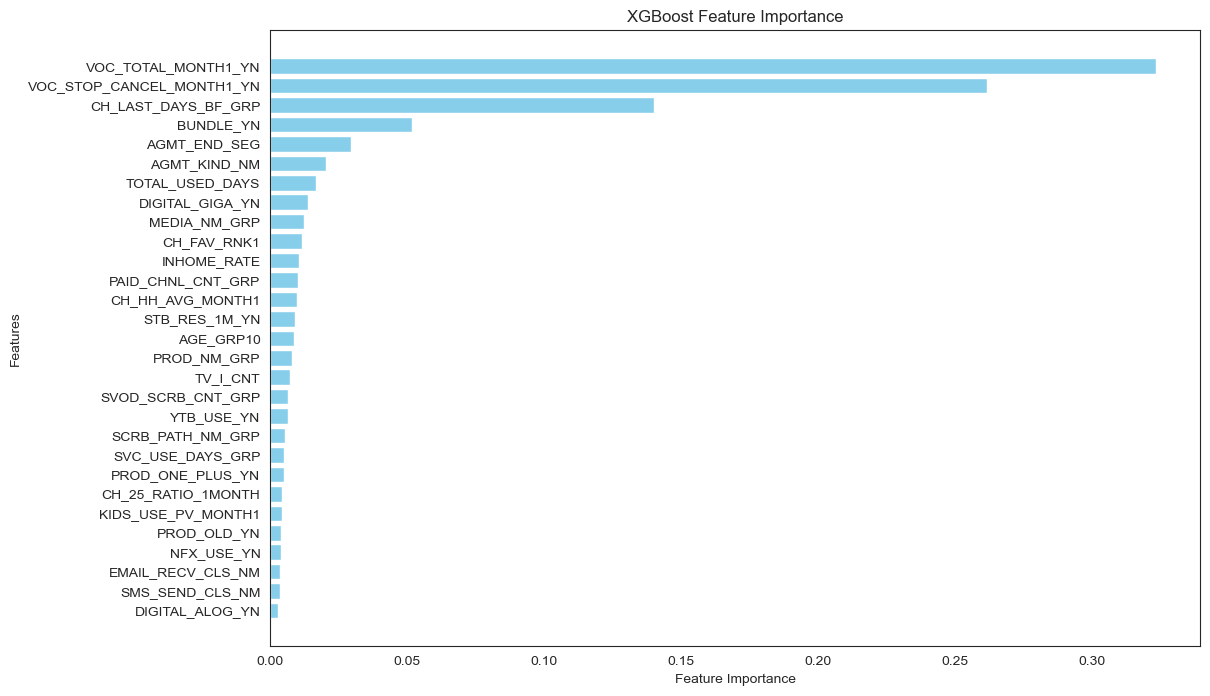

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# XGBoost Feature Importance Ï∂îÏ∂ú
feature_importance = xgb_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 2. SMOTE-NC Îç∞Ïù¥ÌÑ∞Î°ú XGB ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [10]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©, Ï†ïÍ∑úÌôîÎ•º ÏßÑÌñâÌïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞.

train = pd.read_csv("data/train/smote_modeling/train.csv")
test = pd.read_csv("data/train/smote_modeling/test.csv")

XGB ÌïôÏäµ

In [11]:
from xgboost import XGBClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.86

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.86      0.93   1932419
           1       0.02      0.48      0.04     13176

    accuracy                           0.86   1945595
   macro avg       0.51      0.67      0.48   1945595
weighted avg       0.99      0.86      0.92   1945595


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1668946  263473]
 [   6850    6326]]


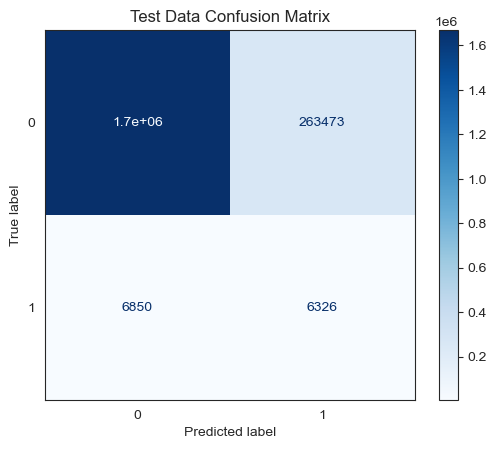

Test AUC-ROC: 0.74


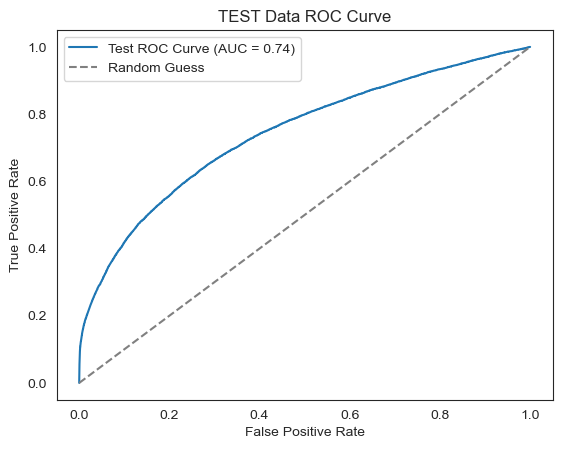

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = xgb_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

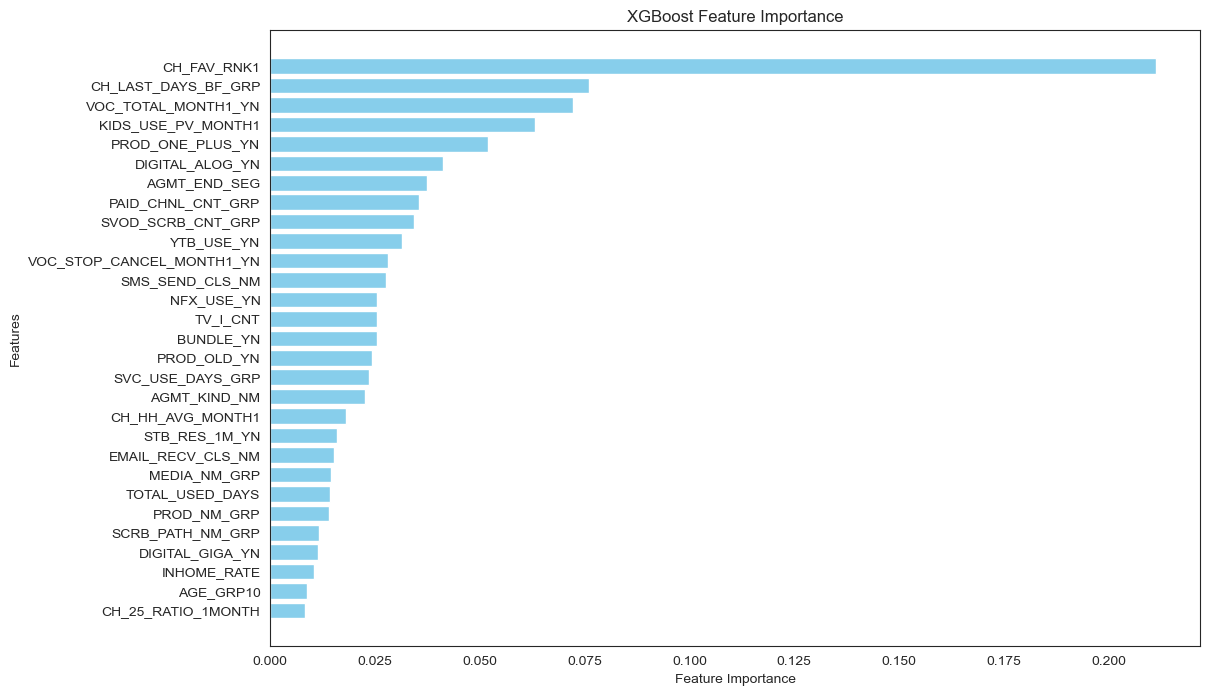

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 3. SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞Î°ú XGB ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [4]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©, Ï†ïÍ∑úÌôîÎ•º ÏßÑÌñâÌïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞.

train = pd.read_csv("data/train/smoterandom_modeling/train.csv")
test = pd.read_csv("data/train/smoterandom_modeling/test.csv")

XGB ÌïôÏäµ

In [13]:
from xgboost import XGBClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    # Í∞ÄÏ§ëÏπò
    scale_pos_weight=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.73

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.73      0.84   1932419
           1       0.02      0.63      0.03     13176

    accuracy                           0.73   1945595
   macro avg       0.51      0.68      0.44   1945595
weighted avg       0.99      0.73      0.84   1945595


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1413323  519096]
 [   4908    8268]]


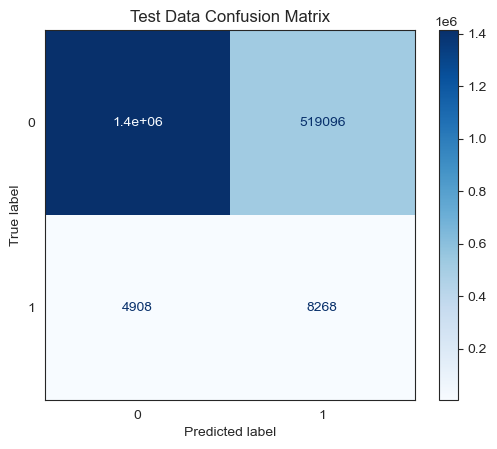

Test AUC-ROC: 0.74


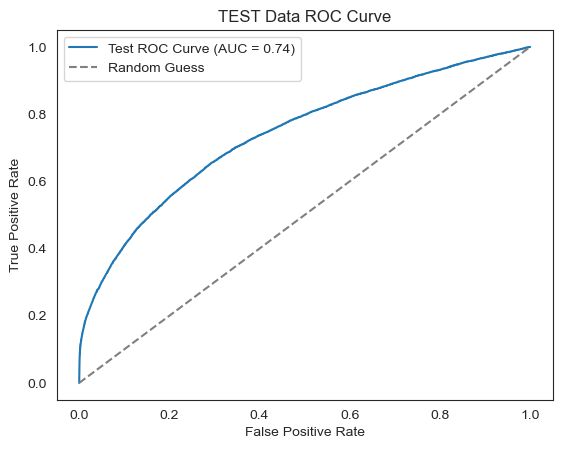

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = xgb_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

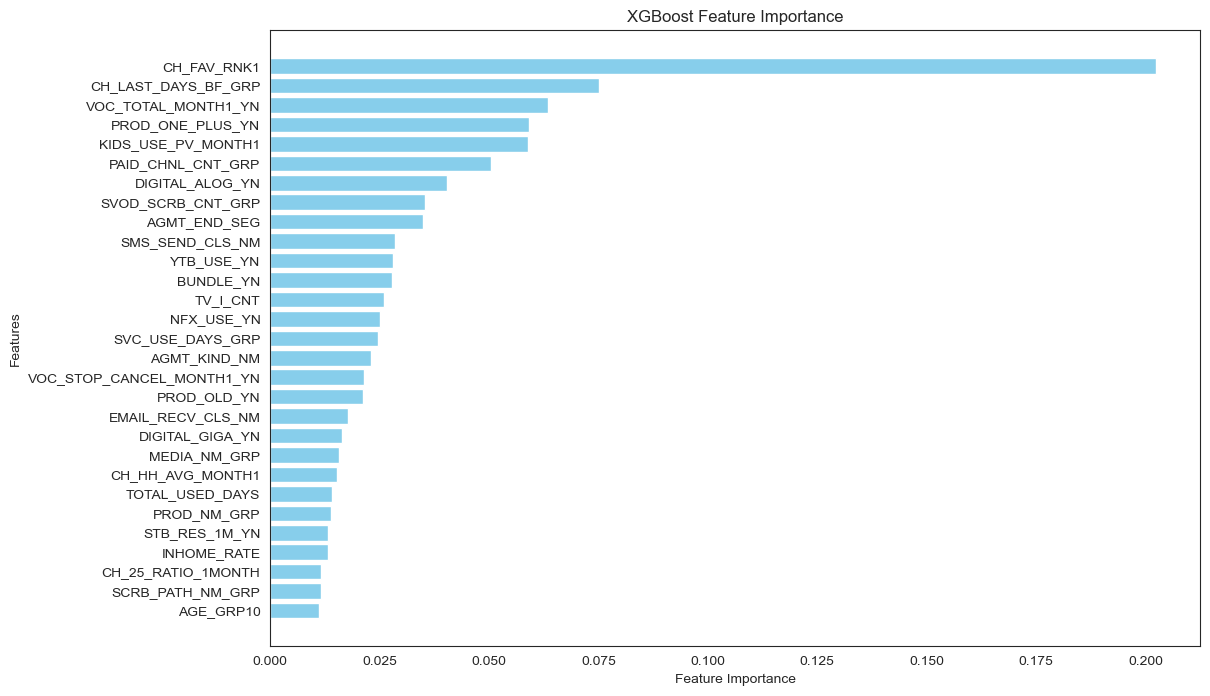

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 4. Í∞ÄÏ§ëÏπòÎ°ú XGB ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [4]:
train = pd.read_csv("data/train/train_weights.csv")
test = pd.read_csv("data/train/test.csv")

In [5]:
display(train)
display(test)

sha2_hash  \
0        0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1        0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
3        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
4        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
...                                                                   ...   
3914836  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
3914837  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
3914838  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
3914839  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
3914840  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0           4     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1           5     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
2           4      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
3           5      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
4           4          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
...       ...              ...          ...         ...         ...   
3914836     5      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
3914837     4          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
3914838     5          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
3914839     4          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
3914840     5          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   

        PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                      Y           Ïã†Í∑ú             N                0Í±¥   
1                      Y           Ïã†Í∑ú             N                0Í±¥   
2                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
3                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
4                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
...                  ...          ...           ...               ...   
3914836                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
3914837                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
3914838                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
3914839                N           Ïã†Í∑ú             N                0Í±¥   
3914840                N           Ïã†Í∑ú             N                0Í±¥   

        PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                      0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
1                      0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
2                      0Í±¥              I/B        30.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
3                      0Í±¥              I/B        50.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
4                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
...                   ...              ...          ...           ...   
3914836                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
3914837                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
3914838                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
3914839                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
3914840                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

        AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN 

sha2_hash  \
0        0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
2        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
3        00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17   
4        00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c   
...                                                                   ...   
1945590  ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c   
1945591  ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba   
1945592  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
1945593  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
1945594  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0          11     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1          11     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
2          11          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
3          11          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
4          11          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
...       ...              ...          ...         ...         ...   
1945590    11          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
1945591    11          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1945592    11      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1945593    11          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
1945594    11          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   

        PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
2                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
3                      Y           Ïã†Í∑ú             N                0Í±¥   
4                      Y           Ïã†Í∑ú             N                1Í±¥   
...                  ...          ...           ...               ...   
1945590                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1945591                N           Ïã†Í∑ú             N                1Í±¥   
1945592                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
1945593                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
1945594                N           Ïã†Í∑ú             N                0Í±¥   

        PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                      0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1                      0Í±¥              I/B        70.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî   
2                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
3                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 9~12Í∞úÏõî   
4                      1Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
...                   ...              ...          ...           ...   
1945590                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1945591                0Í±¥              O/B        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1945592                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
1945593                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1945594                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

        AGMT_END_YMD  TOTAL_USED_DAYS BUNDLE_YN DIGITA

In [6]:
# INHOME_RATE Ïª¨ÎüºÏùÄ objectÎ°ú

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [7]:
train = train.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])
test = test.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])

In [8]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# Ïù∏ÏΩîÎî© ÌõÑ, Îã§Ïãú trainÍ≥º testÎ°ú Î∂ÑÎ¶¨

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ


In [9]:
for col, le in label_encoders.items():
    print(f"üîπ {col} Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)
    print("-" * 30)

üîπ SVC_USE_DAYS_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå': 0, '24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå': 1, '36Í∞úÏõî Ïù¥ÏÉÅ': 2, '6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå': 3, '6Í∞úÏõîÎØ∏Îßå': 4}
------------------------------
üîπ MEDIA_NM_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'HD': 0, 'UHD': 1, 'Í∏∞ÌÉÄ': 2}
------------------------------
üîπ PROD_NM_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'Í∏∞ÌÉÄ': 0, 'Î≤†Ïù¥ÏßÅ': 1, 'ÏÑ∏Ïù¥Î≤Ñ': 2, 'Ïä§ÌÉ†Îã§Îìú': 3, 'Ïù¥ÏΩîÎÖ∏ÎØ∏': 4, 'ÌîÑÎ¶¨ÎØ∏ÏóÑ': 5}
------------------------------
üîπ PROD_OLD_YN Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'N': 0, 'Y': 1}
------------------------------
üîπ PROD_ONE_PLUS_YN Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'N': 0, 'Y': 1}
------------------------------
üîπ AGMT_KIND_NM Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'Ïã†Í∑ú': 0, 'ÏïΩÏ†ïÍ∞±Ïã†': 1, 'ÏïΩÏ†ïÏäπÍ≥Ñ': 2, 'ÏïΩÏ†ïÏó∞Ïû•': 3, 'ÏïΩÏ†ïÏ∂ïÏÜå': 4, 'Ïû¨ÏïΩÏ†ï': 5, 'Ï†ïÎ≥¥ÏóÜÏùå': 6}
------------------------------
üîπ STB_RES_1M_YN Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'N': 0, 'Y': 1}
------------------------------
üîπ SVOD_SCRB_C

In [10]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplotÏúºÎ°ú ÌôïÏù∏Ìïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'KIDS_USE_PV_MONTH1', 'CH_25_RATIO_1MONTH']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


In [12]:
display(train, test)

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  PROD_OLD_YN  \
0                    0.25          0.00         0.80         0.00   
1                    0.25          0.00         0.80         0.00   
2                    0.00          0.00         1.00         0.00   
3                    0.00          0.00         1.00         0.00   
4                    0.50          0.00         0.20         0.00   
...                   ...           ...          ...          ...   
3914836              0.00          0.00         0.80         0.00   
3914837              0.50          0.50         0.20         0.00   
3914838              0.50          0.50         0.20         0.00   
3914839              0.50          0.00         0.20         0.00   
3914840              0.50          0.00         0.20         0.00   

         PROD_ONE_PLUS_YN  AGMT_KIND_NM  STB_RES_1M_YN  SVOD_SCRB_CNT_GRP  \
0                    1.00          0.00           0.00               0.00   
1                    1.00          0.00           0.00               0.00   
2                    0.00          0.83           0.00               0.00   
3                    0.00          0.83           0.00               0.00   
4                    1.00          0.83           0.00               0.00   
...                   ...           ...            ...                ...   
3914836              0.00          0.33           0.00               0.00   
3914837              0.00          0.83           0.00               0.00   
3914838              0.00          0.83           0.00               0.00   
3914839              0.00          0.00           0.00               0.00   
3914840              0.00          0.00           0.00               0.00   

         PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                     0.00              0.00         0.10          0.57   
1                     0.00              0.00         0.10          0.57   
2                     0.00              0.00         0.40          0.14   
3                     0.00              0.00         0.60          0.14   
4                     0.00              0.44         0.30          0.14   
...                    ...               ...          ...           ...   
3914836               0.00              0.44         0.00          0.64   
3914837               0.00              0.00         0.30          0.14   
3914838               0.00              0.00         0.30          0.14   
3914839               0.00              1.00         0.10          0.64   
3914840               0.00              1.00         0.10          0.64   

         TOTAL_USED_DAYS  BUNDLE_YN  DIGITAL_GIGA_YN  DIGITAL_ALOG_YN  \
0                  -1.37       1.00             1.00             0.00   
1                  -1.35       1.00             1.00             0.00   
2                   0.89       1.00             1.00             0.00   
3                   0.91       1.00             1.00             0.00   
4                  -0.28       1.00             0.00             0.00   
...                  ...        ...              ...              ...   
3914836             0.61       0.00             0.00             0.00   
3914837            -1.01       1.00             0.00             0.00   
3914838            -0.99       1.00             0.00             0.00   
3914839            -0.42       0.00             0.00             0.00   
3914840            -0.40       0.00             0.00             0.00   

         TV_I_CNT  CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  \
0            0.40                 0.40                 0.00   
1            0.40                 0.60                 0.00   
2            0.20                 0.80                 0.00   
3            0.20                 0.80                 0.00   
4            1.00                 0.80                 1.00   
...           ...                  ...                  ...   
3914836      0.20                 0.

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  PROD_OLD_YN  \
0                    0.25          0.00         0.80         0.00   
1                    0.25          0.00         1.00         0.00   
2                    0.50          0.00         0.20         0.00   
3                    0.50          0.00         0.80         0.00   
4                    0.50          0.00         1.00         0.00   
...                   ...           ...          ...          ...   
1945590              0.50          0.00         0.20         0.00   
1945591              0.50          0.00         0.80         0.00   
1945592              0.00          0.00         0.80         0.00   
1945593              0.50          0.50         0.20         0.00   
1945594              0.50          0.00         0.20         0.00   

         PROD_ONE_PLUS_YN  AGMT_KIND_NM  STB_RES_1M_YN  SVOD_SCRB_CNT_GRP  \
0                    1.00          0.83           0.00               0.00   
1                    0.00          0.83           0.00               0.00   
2                    1.00          0.83           0.00               0.00   
3                    1.00          0.00           0.00               0.00   
4                    1.00          0.00           0.00               0.33   
...                   ...           ...            ...                ...   
1945590              0.00          0.83           0.00               0.00   
1945591              0.00          0.00           0.00               0.33   
1945592              0.00          0.33           0.00               0.00   
1945593              0.00          0.83           0.00               0.00   
1945594              0.00          0.00           0.00               0.00   

         PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                     0.00              0.00         0.30          0.14   
1                     0.00              0.00         0.80          0.50   
2                     0.00              0.44         0.10          0.14   
3                     0.00              0.44         0.10          1.00   
4                     0.33              1.00         0.00          0.64   
...                    ...               ...          ...           ...   
1945590               0.00              1.00         0.00          0.64   
1945591               0.00              0.11         0.10          0.64   
1945592               0.00              0.44         0.00          0.64   
1945593               0.00              0.00         0.30          0.14   
1945594               0.00              1.00         0.00          0.64   

         TOTAL_USED_DAYS  BUNDLE_YN  DIGITAL_GIGA_YN  DIGITAL_ALOG_YN  \
0                  -1.23       1.00             1.00             0.00   
1                   1.03       1.00             1.00             0.00   
2                  -0.14       1.00             0.00             0.00   
3                  -0.57       0.00             0.00             0.00   
4                   0.75       1.00             0.00             0.00   
...                  ...        ...              ...              ...   
1945590             0.50       0.00             0.00             0.00   
1945591            -0.38       1.00             0.00             0.00   
1945592             0.74       0.00             0.00             0.00   
1945593            -0.86       1.00             0.00             0.00   
1945594            -0.28       0.00             0.00             0.00   

         TV_I_CNT  CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  \
0            0.40                 0.80                 0.00   
1            0.20                 0.80                 0.00   
2            1.00                 0.80                 0.00   
3            0.40                 0.80                 0.00   
4            0.60                 0.80                 1.00   
...           ...                  ...                  ...   
1945590      0.20                 0.

XGB ÌïôÏäµ

In [21]:
from xgboost import XGBClassifier

# scale_pos_weight(Í∞ÄÏ§ëÏπò)Î•º 5, 10, 50, 100, 150, 160 Îì±ÏùÑ ÏßÑÌñâÌï¥Î¥Ñ
# xgboostÎäî class_weight = 'balanced'Î•º ÏßÄÏõêÌïòÏßÄ ÏïäÏùå!

X_train = train.drop(columns=['churn'])
y_train = train['churn']

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    # Í∞ÄÏ§ëÏπò
    scale_pos_weight=160,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.80

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89   1932419
           1       0.02      0.74      0.05     13176

    accuracy                           0.80   1945595
   macro avg       0.51      0.77      0.47   1945595
weighted avg       0.99      0.80      0.88   1945595


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1547591  384828]
 [   3413    9763]]


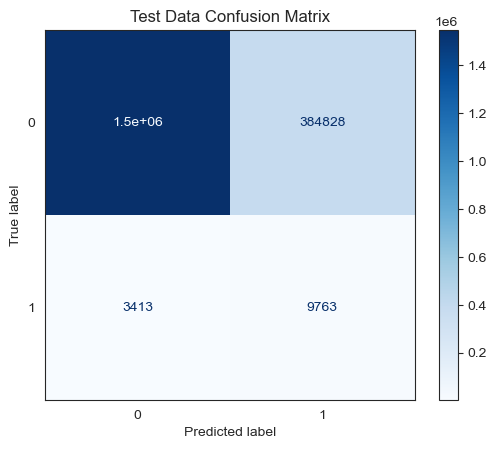

Test AUC-ROC: 0.85


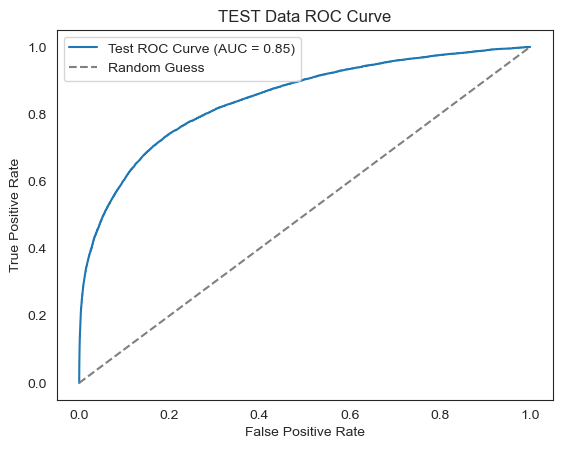

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = xgb_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

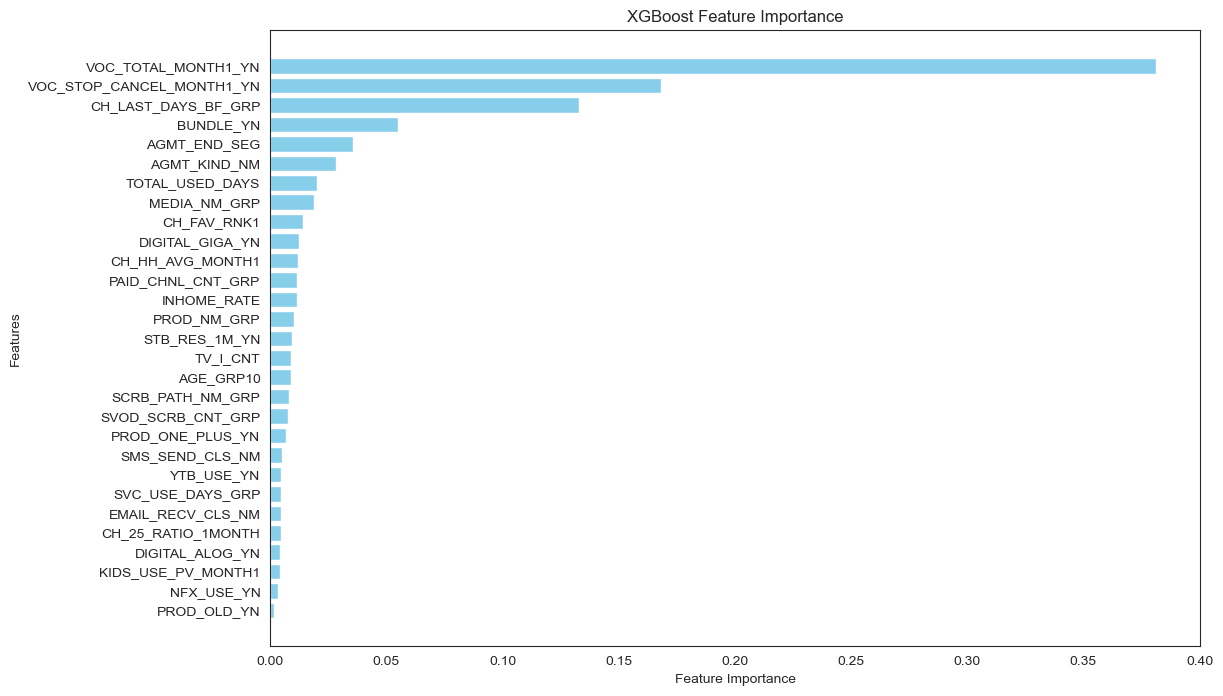

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

#### Í≤∞Î°†
XGBÎäî ÎûúÎç§ Ïñ∏Îçî, Í∞ÄÏ§ëÏπò Ï°∞Ï†ïÏùÑ ÌñàÏùÑ Îïå, Í∞ÄÏû• Ï¢ãÎã§

### üìå XGB ÏÑ±Îä• ÎπÑÍµê (Sampling Í∏∞Î≤ïÎ≥Ñ)

| ÏÉòÌîåÎßÅ Í∏∞Î≤ï             | Accuracy | 1Ïùò Recall | ROC-AUC |
|------------------------|----------|-----------|---------|
| <span style="color:red;">**ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ**</span>     | 0.80     | 0.74      | 0.85    |
| **SMOTE**              | 0.86     | 0.48      | 0.74    |
| **SMOTE + ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ** | 0.73     | 0.63      | 0.74    |
| <span style="color:red;">**Í∞ÄÏ§ëÏπò Ï°∞Ï†ï**</span>       | 0.80     | 0.74      | 0.85    |